# What shall we learn in this course?


We will learn some algorithms and analysis that address the following questions: 


How to solve equations using computers?

solve --> approximately solve

* How accurate?

* How expensive?

    How fast?

    How much resource?
    
* How robust is the algorithm used to compute approximate solutions?
    
    Stability of the comptued solutions against different sorts of perturbations.

Make decision on which algorithm to use.

Decide if we trust the computed results.

At the beginning of the semester, we will start with some examples to illustrate some essential concepts that we shall learn.

# Lecture 1: Operation counts

In numerical analysis and scientific computing, we need to know how "expensive" it is to run certain algorithm.

* "Expensiveness" (cost) may bedefined in many different ways.
* Here we show an example of the number of "floating point operations" relative to the size of data, using in evaluating a polynomial.


## The big O notation

This is a notation for asymptotics. It tells how fast a quantity goes to $\infty$ or $0$ compared/relative to a parameter's going to $infty$ or $0$.

Typically, you will see two sitations:

* for the computation cost of an algorithm relative to the given (large) number of variables ($N$)

$$O(N^p),~~~N\rightarrow\infty$$

or

* for the accuracy of an algorithm relative to a small parameter $\epsilon$, which could be $1/N$, where $N$ is the number of variables involved in the algorithm:

$$O(\epsilon^q),~~~\epsilon\rightarrow 0$$



## Evaluating polynomials

$$p(x)= a_3 x^3 + a_2 x^2 + a_1 x +a_0$$

What is the most efficient way to evalute polynomials?
Obviosuly, we shall not evaluate $x^3$, $x^2$, $x$ separately.

We introduce Horner's method that uses *nested multiplications*.


In [1]:
a = [1.0 2.0 3.0 1.0134]


#the most straightforward way

p(x)= a[4]*x.^3 .+ a[3]*x.^2 .+ a[2]*x .+ a[1]

p (generic function with 1 method)

In [7]:
x=1

p(x)

X = [ 1.2 0.44 -5.0]
display(p(X))

p(X[1]), p(X[2]), p(X[3])

1×3 Array{Float64,2}:
 9.47116  2.54713  -60.675

(9.4711552, 2.5471254655999997, -60.67500000000001)

In [48]:
p_smart(x) = ((a[4].*x.+a[3]).*x.+a[2]).*x.+a[1]

p_smart (generic function with 1 method)

In [51]:
@time p_smart(x)

  0.000370 seconds (22 allocations: 781.828 KiB)


100000-element Array{Float64,1}:
 2.900676407894041 
 2.6376113085835566
 1.623173751439899 
 2.002224831971807 
 2.8392150084222525
 1.193834103018485 
 1.2182205568993223
 6.31760781807919  
 1.8350299142065243
 6.655691238112637 
 2.3729633593039368
 3.923919962957055 
 2.936000673525715 
 ⋮                 
 1.2659881546982608
 5.391745086770009 
 1.5784565302652234
 6.084485705511977 
 1.825791593313085 
 2.1378120111586987
 1.145936531817891 
 2.677726580522279 
 2.3593877455516488
 2.8955555014146315
 5.64643546734121  
 2.3841316416999483

Homeowork: write a general function that evaluate polynomials efficiently for each of the elements in the input vector x
Polynomials of the follow form:
$$ P(x)= a_{n+1}x^n+a_{n}x^{n-1}+\cdots+a_1x+a_1$$

In [41]:
function P( a::Array{Float64}, x::Array{Float64})
    
    val=copy(x)
    val.=a[end]
    
    for k in length(a)-1:-1:1
        val .= (val.*x.+a[k])
    end
    
    return val
end

P (generic function with 1 method)

In [54]:
@time P(a,x)

  0.000644 seconds (6 allocations: 781.484 KiB)


100000-element Array{Float64,1}:
 2.900676407894041 
 2.6376113085835566
 1.623173751439899 
 2.002224831971807 
 2.8392150084222525
 1.193834103018485 
 1.2182205568993223
 6.31760781807919  
 1.8350299142065243
 6.655691238112637 
 2.3729633593039368
 3.923919962957055 
 2.936000673525715 
 ⋮                 
 1.2659881546982608
 5.391745086770009 
 1.5784565302652234
 6.084485705511977 
 1.825791593313085 
 2.1378120111586987
 1.145936531817891 
 2.677726580522279 
 2.3593877455516488
 2.8955555014146315
 5.64643546734121  
 2.3841316416999483

# Lecture 2: Floating point numbers and loss of significant digits

## Another example: solving a quadratic equation

$$ ax^2+bx+c=0 $$

Let's implement the formula:

$$x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

The problem with this formula is that when $b^2$ is very large compared to $4ac$, we may lose a lot of information in computing $b^2-4ac$ due to *round off errors*.


In [1]:
roots(a,b,c) =  ((-b+sqrt(b^2-4a*c))/(2a), (-b-sqrt(b^2-4a*c))/(2a))

roots (generic function with 1 method)

In [12]:
a, b, c = 1.0, 9.0^12, -3.0

Q(x)=a*x.^2 .+ b*x .+ c

r1, r2 =roots(a,b,c)

#println("The residual: ",Q([r1,r2]))

display(r1)

display(sqrt(b^2-4a*c))
display(b)

0.0

2.82429536481e11

2.82429536481e11

In [16]:
display(b^2)
display(4a*c)

display(b^2-4a*c)

7.976644307687251e22

-12.0

7.976644307687251e22

In [13]:
A,B,C = big.( (a,b,c) )

(1.0, 2.82429536481e+11, -3.0)

In [14]:
R1, R2=roots(A,B,C)

Q([R1, R2])

R1

1.062211848441644930860055321254373665493827609316243536458177956524440072302496e-11

In [15]:
improved_root1(a,b,c) =  (-2c)/(b+sqrt(b^2-4a*c))

improved_root1(a,b,c)

1.062211848441645e-11

## An example about stability of an algorithm

We solve $$ x^\prime = \lambda x,~~~x(0)=x_0.$$

The solution is $ x(t)=x_0 e^{-2t}$

In [105]:
x_exact(x0,T; λ=-1.0) = x0*exp.(λ*T)

ErrorException: cannot define function x_exact; it already has a value

In [92]:
function fe_steps(x0, Δt, nsteps; λ=-1.0)
   
    x=zeros(nsteps+1)
    t=zeros(nsteps+1)
    
    x[1]=x0
    t[1]=0.0
    
    for k=1:nsteps 
        x[k+1]=x[k]+Δt*(λ*x[k])
        t[k+1]=t[k]+Δt
    end
    
    return (x, t)
end

fe_steps (generic function with 1 method)

In [93]:
function be_steps(x0, Δt, nsteps; λ=-1.0)
   
    x=zeros(nsteps+1)
    t=zeros(nsteps+1)
    
    x[1]=x0
    t[1]=0.0
    
    for k=1:nsteps 
        x[k+1]=x[k]/(1-Δt*λ)
        t[k+1]=t[k]+Δt
    end
    
    return (x, t)
end

be_steps (generic function with 1 method)

In [101]:
X,T=fe_steps(10.1, 0.02, 10)

([10.1, 9.898, 9.70004, 9.5060392, 9.315918416, 9.12960004768, 8.9470080467264, 8.768067885791872, 8.592706528076034, 8.420852397514514, 8.252435349564223], [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.19999999999999998])

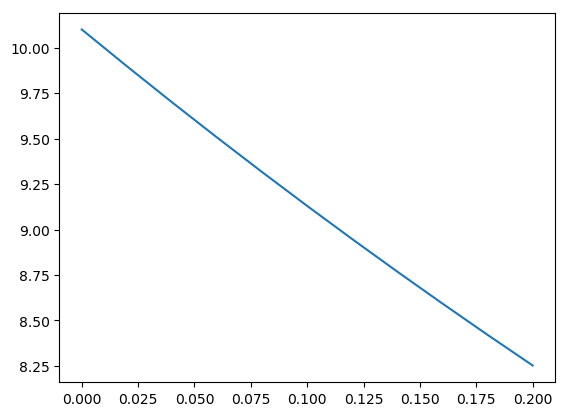

-0.0020066003982286418

In [103]:
using PyPlot

plot(T,X)

X[2]-x_exact[2]

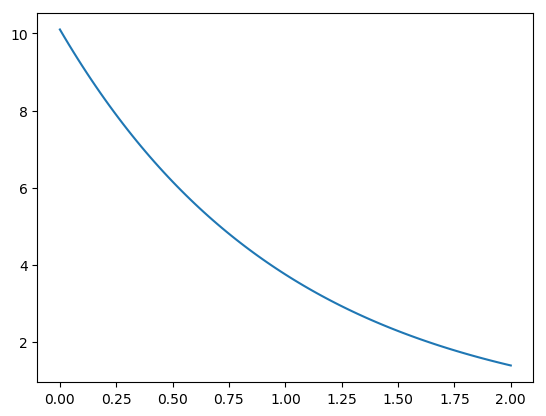

0.0019541839154975094

In [104]:
X,T=be_steps(10.1, 0.02, 100)

plot(T,X)

X[2]-x_exact[2]

In [50]:
8.08-8.27

-0.1899999999999995

In [51]:
8.41-8.27

0.14000000000000057